<a href="https://www.kaggle.com/code/mohainurrohman/sentiment-analysis-kai-access-with-cnn-1d?scriptVersionId=115493944" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents

* [Abstract](#abstract)
* [1. Introduction](#1)
* [2. Literature Review](#2)
* [3. Design System](#3)
* [4. Experiment](#4)
    - [4.1 Install Library](#4.1)
    - [4.2 Load Library](#4.2)
    - [4.3 Load Data](#4.3)
    - [4.4 Exploratory Data Analysis](#4.4)
        - [4.4.1 Remove missing value](#4.4.1)
        - [4.4.2 Sentiment Distribution](#4.4.2)
    - [4.5 Data Preparation](#4.5)
        - [4.5.1 Data Cleaning](#4.5.1)
        - [4.5.2 Splitting Data](#4.5.2)
        - [4.5.3 Tokenizer](#4.5.3)
        - [4.5.4 Sequence](#4.5.4)
        - [4.5.5 Sequence Normalization](#4.5.5)
    - [4.6 Modelling](#4.6)
        - [4.6.1 Build Model](#4.6.1)
        - [4.6.2 Train Model](#4.6.2)
    - [4.7 Evaluation](#4.7)
        - [4.7.1 Model Accuracy](#4.7.1)
        - [4.7.2 Identify Overfitting](#4.7.2)
        - [4.7.3 Confusion Matrix](#4.7.3)
        - [4.7.4 ROC AUC](#4.7.4)
* [5. Result](#5)
* [6. Conclusion](#6)

<a id="abstract"></a>
## Abstrak

Kereta Api Indonesia Access (KAI Access) is a train ticket booking application developed and published by PT Kereta Api Indonesia since 2014. KAI Access is an official application from PT KAI, and was released to meet the needs of passengers on long, medium and long distance trains. as well as local/commuter. Launched on September 4 2014, KAI Access initially only offered features for booking train tickets for both long and medium distances, but now KAI Access has penetrated into booking local train tickets, canceling, changing seat numbers, and changing departure times. However, to find out how good an application is, certain techniques are needed, including sentiment analysis. In this experiment, sentiment analysis was carried out on KA Access data using CNN 1D, with testing and evaluation using the confusion matrix and ROC-AUC. The results show good results, with 90% accuracy, 90% precision, 90% recall, 90% f1-score, and 90% ROC-AUC.

<a id="1"></a>
### 1. Introduction

Kereta Api Indonesia Access (KAI Access) is a train ticket booking application developed and published by PT Kereta Api Indonesia since 2014. KAI Access is an official application from PT KAI, and was released to meet the needs of passengers on long, medium and long distance trains. as well as local/commuter. Launched on September 4 2014, KAI Access initially only offered features for booking train tickets for both long and medium distances, but now KAI Access has penetrated into booking local train tickets, canceling, changing seat numbers, and changing departure times. To find out how good this application is, special techniques are needed, including sentiment analysis.

Sentiment analysis is a field of study that analyzes opinions, sentiments, attitudes, and emotions from people such as products, services, organizations, issues, events, and their attributes.

In this experiment, I will conduct a sentiment analysis on the KAI Access application using data reviews from users. This data contains more than 200,000 reviews and is in the Indonesian language. The data comes from scraping the Google Play Store. Ratings 1-2 are transformed into 'negative' and 4-5 are transformed into 'positive', and ratings 3 are removed.

In this experiment, the model used is a 1D Convolutional Neural Network (CNN). After the data is modeled, it is then evaluated using the confusion matrix and ROC-AUC.

### Research Problem
How to do sentiment analysis using CNN?


### Research Question
How high is the accuracy of sentiment analysis using CNN?

### Research Objective
This experiment aims to perform sentiment analysis using CNN.


<a id="2"></a>
### 2. Literature Review

Convolutional Neural Networks (CNNs or ConvNETs) are Deep Learning algorithms that process images, assign importance to objects in the image using learnable weights and biases, and can differentiate images from each other. A convolutional neural network is essentially a neural network that uses a convolution layer and pooling layer. The convolutional layer convolves into a smaller area to extract features, while the pooling layer picks the data with the highest value within an area. They require less pre-processing in comparison to other classification algorithms and are able to learn filters and characteristics. The architecture of convolutional neural networks was based on the organization of the visual cortex. They use computer vision, natural language processing, and recommender systems to perform generative and descriptive tasks.

**Pros**

* CNNs do not require human supervision for the task of identifying important features.
* They are very accurate at image recognition and classification.
* Weight sharing is another major advantage of CNNs.
* Convolutional neural networks also minimize computation in comparison with a regular neural network.
* CNNs make use of the same knowledge across all image locations.

**Cons**

* They fail to encode the position and orientation of objects. They have a hard time classifying images with different positions.
* A lot of training data is needed for the CNN to be effective.
* CNNs tend to be much slower because of operations like maxpool.
* In case the convolutional neural network is made up of multiple layers, the training process could take a particularly long time if the computer does not have a good GPU.
* Convolutional neural networks will recognize the image as clusters of pixels which are arranged in distinct patterns. They don’t understand them as components present in the image.

<a id="3"></a>
### 3. Design System

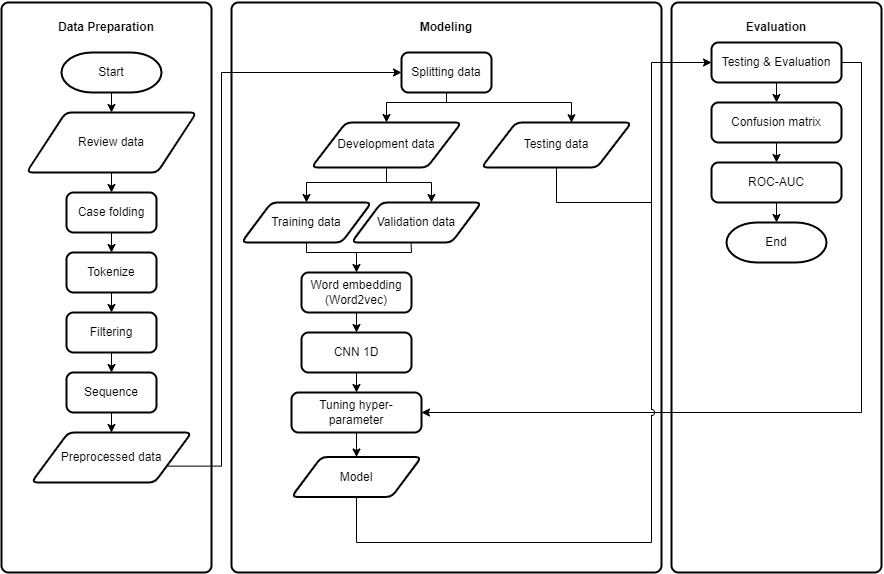

<a id="4"></a>
### 4. Experiment

<a id="4.1"></a>
### 4.1 Install Library

In [1]:
!pip install Sastrawi
!pip install contractions

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 6.2 MB/s eta 0:00:0000:01


<a id="4.2"></a>
### 4.2 Load Library

In [2]:
import re
import nltk
import tqdm
import unicodedata
import numpy as np
import contractions
import pandas as pd
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from keras.models import load_model
from nltk.tokenize import word_tokenize
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

<a id="4.3"></a>
### 4.3 Load Data

In [3]:
df = pd.read_csv('/kaggle/input/kai-access-reviews/KAI Access Reviews.csv')
df.rename(columns = {'rating':'sentiment'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64993 entries, 0 to 64992
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       64993 non-null  object
 1   review     64982 non-null  object
 2   sentiment  64993 non-null  int64 
 3   date       64993 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
df = df.sort_values(by='date', ascending=False)
df = df[['review', 'sentiment']]
df.head()

,review,sentiment
0,masih suka timeout,2
1,Aplikasi masih sering force close,2
2,"Pembelian tiket berhasil, tanpa vaksin. tapi s...",1
3,"Emang bener lagunya iwan fals ""biasanya, Keret...",1
4,RAENEK KEPASTIAN KOYO HUBUNGAN KU GELO AKUUU!!,1


<a id="4.4"></a>
### 4.4 Exploratory Data Analysis

In [5]:
#removing rating 3
df = df[df.sentiment != 3]
df = df.replace({'sentiment' : {1:0, 2:0, 4:1, 5:1 }})
df.head()

,review,sentiment
0,masih suka timeout,0
1,Aplikasi masih sering force close,0
2,"Pembelian tiket berhasil, tanpa vaksin. tapi s...",0
3,"Emang bener lagunya iwan fals ""biasanya, Keret...",0
4,RAENEK KEPASTIAN KOYO HUBUNGAN KU GELO AKUUU!!,0


<a id="4.4.1"></a>
### 4.4.1 Remove missing value

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59818 entries, 0 to 64992
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     59818 non-null  object
 1   sentiment  59818 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


<a id="4.4.2"></a>
### 4.4.2 Sentiment Distribution

In [8]:
x = df.sentiment.value_counts()
x

1    30800
0    29018
Name: sentiment, dtype: int64

Text(0, 0.5, 'sample')

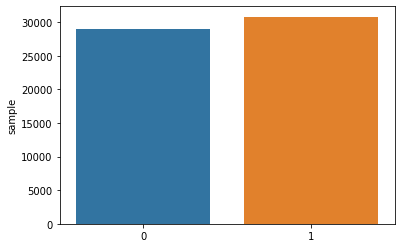

In [9]:
sns.barplot(x.index, x)
plt.gca().set_ylabel('sample')

<a id="4.5"></a>
### 4.5 Data Preparation

<a id="4.5.1"></a>
### 4.5.1 Data Cleaning

In [10]:
def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    #list_stopwords = stopwords.words('english')
    #list_stopwords.extend([])
    #txt_stopword = pd.read_csv("#", names= ["stopwords"], header = None)
    #list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
    return [word for word in words if word not in list_stopwords]

In [11]:
def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)
  
  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [12]:
%%time
df.review = pre_process_corpus(df.review)

100%|██████████| 59818/59818 [00:30<00:00, 1985.86it/s]

CPU times: user 28.4 s, sys: 1.65 s, total: 30.1 s
Wall time: 30.2 s


In [13]:
df.head()

,review,sentiment
0,masih suka timeout,0
1,aplikasi masih sering force close,0
2,pembelian tiket berhasil tanpa vaksin tapi set...,0
3,emang bener lagunya iwan fals biasanya kereta ...,0
4,raenek kepastian koyo hubungan ku gelo akuuu,0


<a id="4.5.2"></a>
### 4.5.2 Splitting Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.2, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((47854,), (11964,), (47854,), (11964,))

<a id="4.5.3"></a>
### 4.5.3 Tokenizer

In [15]:
token = Tokenizer()
token.fit_on_texts(X_train)

In [16]:
vocab = len(token.index_word) + 1
print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Documents={}".format(token.document_count))

Vocabulary size=28706
Number of Documents=47854


<a id="4.5.4"></a>
### 4.5.4 Sequence

In [17]:
train_sequences = token.texts_to_sequences(X_train)
test_sequences = token.texts_to_sequences(X_test)

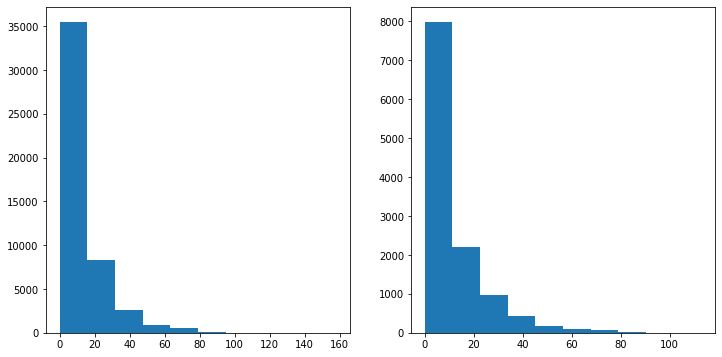

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

<a id="4.5.5"></a>
### 4.5.5 Sequence Normalization

In [19]:
#padding
MAX_SEQUENCE_LENGTH = 30
X_train = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_train.shape, X_test.shape

((47854, 30), (11964, 30))

<a id="4.6"></a>
### 4.6 Modelling

<a id="4.6.1"></a>
### 4.6.1 Build Model

In [20]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab, vec_size, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(64,8, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Nadam(learning_rate=0.00001), metrics=['accuracy'])
model.summary()

2023-01-04 15:35:02.098559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 300)           8612100   
_________________________________________________________________
conv1d (Conv1D)              (None, 23, 64)            153664    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 64)            0         
_________________________________________________________________
dense (Dense)                (None, 11, 16)            1040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 16)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 11, 8)             1

2023-01-04 15:35:02.099587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 15:35:02.370040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 15:35:02.370999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 15:35:02.371806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 15:35:02.372581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

<a id="4.6.2"></a>
### 4.6.2 Train Model

In [21]:
epochs = 100
batch_size = 16

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_model_cnn1d.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

Epoch 1/100


2023-01-04 15:35:07.343989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-04 15:35:10.219747: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2692/2692 [==============================] - 32s 7ms/step - loss: 0.6217 - accuracy: 0.7261 - val_loss: 0.5737 - val_accuracy: 0.7459

Epoch 00001: val_accuracy improved from -inf to 0.74593, saving model to ./best_model/best_model_cnn1d.h5
Epoch 2/100
2692/2692 [==============================] - 20s 7ms/step - loss: 0.5153 - accuracy: 0.7771 - val_loss: 0.5013 - val_accuracy: 0.7871

Epoch 00002: val_accuracy improved from 0.74593 to 0.78709, saving model to ./best_model/best_model_cnn1d.h5
Epoch 3/100
2692/2692 [==============================] - 20s 7ms/step - loss: 0.4639 - accuracy: 0.8078 - val_loss: 0.4592 - val_accuracy: 0.8136

Epoch 00003: val_accuracy improved from 0.78709 to 0.81362, saving model to ./best_model/best_model_cnn1d.h5
Epoch 4/100
2692/2692 [==============================] - 19s 7ms/step - loss: 0.4295 - accuracy: 0.8247 - val_loss: 0.4344 - val_accuracy: 0.8345

Epoch 00004: val_accuracy improved from 0.81362 to 0.83452, saving model to ./best_model/best_model_

<a id="4.7"></a>
### 4.7 Evaluation

<a id="4.7.1"></a>
### 4.7.1 Model Accuracy

In [22]:
saved_model = load_model('./best_model/best_model_cnn1d.h5')
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

374/374 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.8992
Train: 92.67%, Test: 89.92%


<a id="4.7.2"></a>
### 4.7.2 Identify Overfitting

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


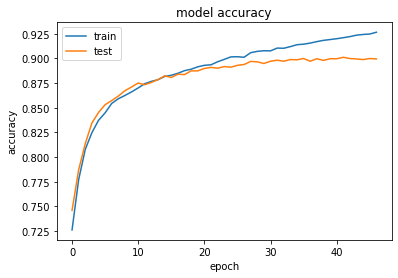

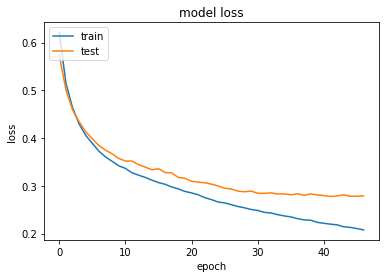

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a id="4.7.3"></a>
### 4.7.3 Confusion Matrix

In [24]:
def predictions(x):
    prediction_probs = model.predict(x)
    predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
    return predictions

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labels = ['positive', 'negative']
print("CNN 1D Accuracy:" , accuracy_score(y_test, predictions(X_test)))
print("CNN 1D Precision:" , precision_score(y_test, predictions(X_test), average="macro"))
print("CNN 1D Recall:" , recall_score(y_test, predictions(X_test), average="macro"))
print("CNN 1D f1_score:" , f1_score(y_test, predictions(X_test), average="macro"))
print('================================================\n') 
print(classification_report(y_test, predictions(X_test)))
pd.DataFrame(confusion_matrix(y_test, predictions(X_test)), index=labels, columns=labels)

CNN 1D Accuracy: 0.9007021063189569
CNN 1D Precision: 0.9011691178287534
CNN 1D Recall: 0.9017813869548235
CNN 1D f1_score: 0.9006856512149302

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5728
           1       0.93      0.88      0.90      6236

    accuracy                           0.90     11964
   macro avg       0.90      0.90      0.90     11964
weighted avg       0.90      0.90      0.90     11964



,positive,negative
positive,5311,417
negative,771,5465


<a id="4.7.4"></a>
### 4.7.4 ROC AUC

In [26]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model AUC score: 0.9017813869548235


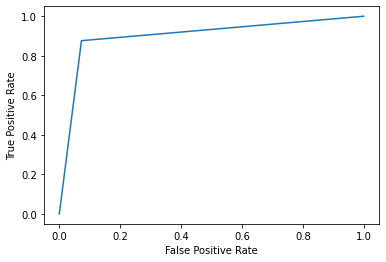

In [27]:
plot_roc_curve(y_test, predictions(X_test))
print(f'model AUC score: {roc_auc_score(y_test, predictions(X_test))}')

<a id="5"></a>
### 5. Result

This experiment uses a division of training data and testing data of 80:20 with a total of 47854:11964 data, and shows the results of 90% accuracy, 90% precision, 90% recall, and 90% f1-score.

<a id="6"></a>
### 6. Conclusion

Sentiment analysis experiments using CNN showed good results, the values for accuracy, precision, recall, and f1-score showed results above 90%. For further experiments, transformers may be added to focus on the words that contribute the most or hybridized with other Deep Learning models.